In [77]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json 
import sys
import os 

##Scope: 2.	Es “éxito” el que tu video aparezca más días como trending?


In [78]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"

original_df = pd.read_csv(us_csv)
original_df.head(500)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [79]:
# Rename column name 
df= original_df.rename(columns={"video_id": "id"})

#                                        "trending_date": "Trending Date",
#                                        "title": "Title",
#                                        "channel_title": "Channel",
#                                        "category_id": "Category",
#                                        "publish_time": "Publish Date",
#                                        "tags": "Tags",
#                                        "views": "Views",
#                                        "likes": "Likes",
#                                        "dislikes": "Dislikes",
#                                        "comment_count": "Comments"})

df.columns

Index(['id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Cleaning Data 

In [80]:
# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']
del df['thumbnail_link']

In [81]:
df.head(100)

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 weeks with iphone x,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy moore & jeff sessions cold open - snl,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 ice cream gadgets put to the test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The greatest showman | official trailer 2 [hd]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,"For now, at least, we have better things to wo..."


In [82]:
df["id"].count()

40949

In [83]:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]

video_trending_count.sort_values(ascending=False)

id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
MAjY8mCTXWk    29
r-3iathMo7o    29
NBSAQenU2Bk    29
WIV3xNz8NoM    28
6S9c5nnDd_s    28
YI3tsmFsrOg    28
vjSohj-Iclc    28
ulNswX3If6U    28
UfKmSfgFxi8    28
2PH7dK6SLC8    28
mdWcaWBxxcY    28
6SuMbFuKDf8    27
BspHjvU11y4    27
-kTWIm7m4Uw    27
H7gh2fmdjCU    27
um-1fAVU1OQ    27
TjXQzRWmb_I    27
Xpv-sEKl1B4    27
nRc0kmOYgzQ    27
1purAy2MsOc    27
0zZ0Y_UZRBw    27
pFc6I0rgmgY    27
ju_inUnrLc4    26
ooyjaVdt-jA    26
D6Oy4LfoqsU    26
               ..
4qSziR6sD8Q     1
uEhv-4Eb9ms     1
J_fFW78fc7s     1
JBw1nwYJESc     1
ilTHiqAmuX8     1
IJKjMIU55pE     1
thIRJLsnIxY     1
tclPO3kOlfM     1
IJlXXvSFyUU     1
IKuKZIISPE0     1
jQF5Q3773uk     1
IOuFE-6Awos     1
5Smb3tZD1Qc     1
5SkwvwSydmk     1
5RjEaUqucbw     1
IXJhN4cOVM0     1
jGyUVyp9w9g     1
jE2VvGZktJo     1
J-NEOU-Ujeg     1
IbmvDn6I6sI     1
IfYRzxeMdGs     1
j28Gt5_Mlo8     1
5HUCAF6898w     1
5HOijUtExiM     1
IlkBLwl

In [84]:
#top100_trending_videos = video_trending_count.loc[video_trending_count["id"]]
# school_passing_math = merge_df.loc[merge_df["Math Score"]>= 70,:].groupby(["School Name"]).count()



### 3. Top 100 channels with more trending videos

In [85]:
#3.	Es éxito el que tu canal tenga más videos trending? (Brach: trending_channels) CM
#3.1. Lista de los 100 Canales de los videos que estuvieron mas dias trending. 
#3.2. Canal con mas videos trending

#•	Filtrar por Canal – videos únicos - contar cuantas veces estuvo trending.
#•	Para tener una lista de 100 canales con el mayor número de videos trending: (terminar pseudo)
#•	Teniendo nuestro listado de canales con mayor número de videos trending, veremos tendencias entre ellos como: Categorías y tags, generals y por mes.


In [86]:
#•	Filtrar por Canal – videos únicos - contar cuantas veces estuvo trending 
#3.1. Canal con el video que estuvo mas dias trending



In [91]:
# crear lista de los 20 primeros canales unicos de los videos que estuvieron mas dias trending

trending_videos_per_channel= pd.DataFrame(df.groupby("channel_title").id.nunique().sort_values(ascending=False))
trending_videos_per_channel=trending_videos_per_channel[:20]
trending_videos_per_channel.reset_index(inplace=True)
trending_videos_per_channel

,channel_title,id
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,The Late Show with Stephen Colbert,58
5,Netflix,58
6,NBA,55
7,CNN,52
8,Vox,47
9,The Late Late Show with James Corden,46


In [88]:
###### Plot of the 20 channels with more trending videos.##### PODEMOS NOTAR QUE EL CANAL CON MAS VIDEOS TRENDING ES ESPN.

In [89]:
# set x, y axis and tick locations:

x_axis= trending_videos_per_channel["channel_title"]
y_axis= trending_videos_per_channel["id"]
tick_locations = [value for value in x_axis]

(0, 94)

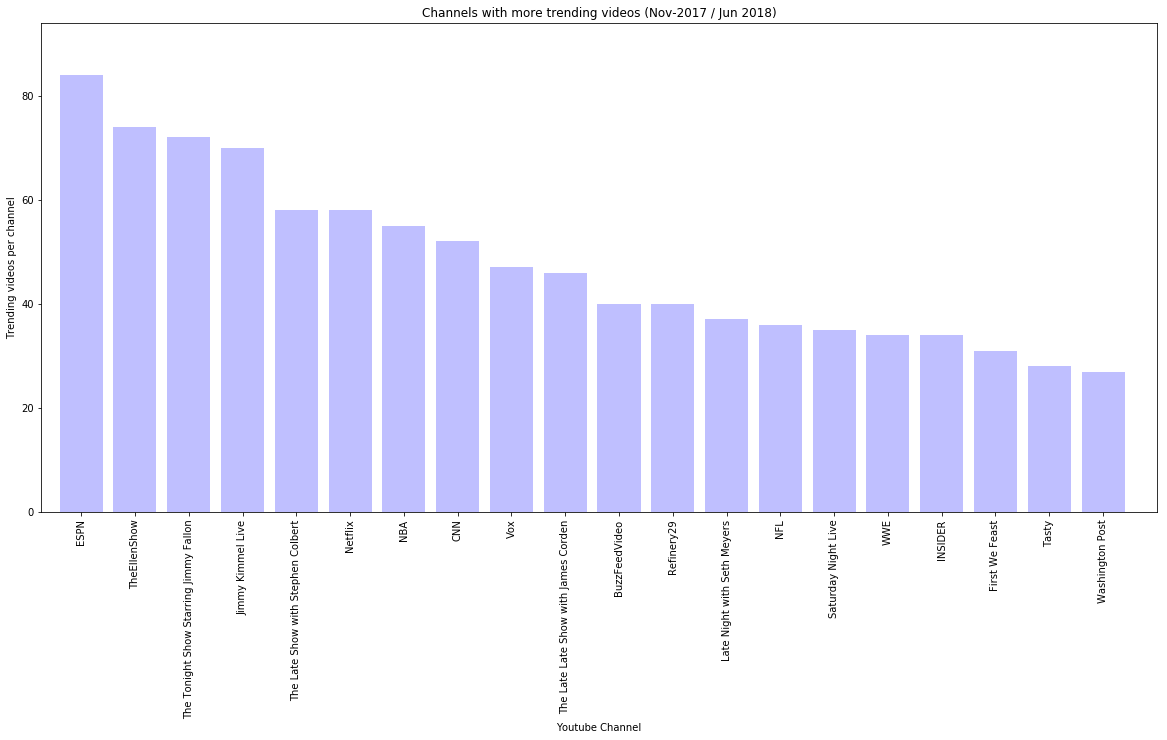

In [54]:
plt.figure(figsize=(20,9))
# Create a bar chart based upon the above data
top_channel_plot= plt.bar(x_axis, y_axis, color="b", alpha=0.25, align="center") 
plt.xticks(tick_locations,trending_videos_per_channel["channel_title"], rotation="vertical")
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)

# Set a Title and labels
plt.title("Channels with more trending videos (Nov-2017 / Jun 2018)")
plt.xlabel("Youtube Channel")
plt.ylabel("Trending videos per channel")

# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)



### Hacer el mismo plot pero con la relacion por mes?????#######

### 3.2. Canal con mas videos trending

In [55]:

# Create a new list with the top 100 channels with more videos trending
#3.2. Canal con mas videos trending.(hacer lista de los 100 primeros)
# channels_in_order= channels_df.groupby("channel_title").agg({"trending_date": pd.Series.nunique})
# channels_in_order.sort_values(by="trending_date", ascending=False)
# Create a DF with the 100 channels and each video infos

### 3.3 Interactions

In [56]:
# Relacion Likes and interactions

relation_likes = df["likes"]/ (df["likes"]+df["dislikes"])

# Relacion dislikes and interactions

relation_dislikes = df["dislikes"]/ (df["likes"]+df["dislikes"])

# Nivel de aprobacion
approve_level = df["likes"]/ (df["views"])

# Nivel de rechazo

rejection_level = df["dislikes"]/ (df["views"])

# Relacion comentarios y views

comment_level = df["comment_count"]/ (df["views"])

# indicador de reaccion basado en likes y dislikes. 

reaction_indicator = (df["likes"] + df["dislikes"])/ df["views"]


# una persona puede ver varias veces el video y una sola vez marcar like o dislike, 
# ademas una persona puede agregar el numero de comentarios que desee.
# dado que no tenemos forma de saber cuantas veces una persona vio un video o si dio like y comentario, o numero de comentario
# un indicador global de reaccion es:

reaction_global_indicator = (df["likes"] + df["dislikes"]+ df["comment_count"])/ df["views"]

# agregar indicadores a la data frame

df["relation_likes"] = relation_likes
df["relation_dislikes"] = relation_dislikes
df["approve_level"] = approve_level
df["rejection_level"] = rejection_level
df["comment_level"] = comment_level
df["reaction_indicator"] = reaction_indicator
df["reaction_global_indicator"] = reaction_global_indicator

df.head()






,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,relation_likes,relation_dislikes,approve_level,rejection_level,comment_level,reaction_indicator,reaction_global_indicator
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970,0.049030,0.076869,0.003963,0.021318,0.080833,0.102151
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",0.940521,0.059479,0.040179,0.002541,0.005252,0.042720,0.047972
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729,0.035271,0.045758,0.001673,0.002563,0.047431,0.049994
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,0.938550,0.061450,0.029641,0.001941,0.006253,0.031582,0.037836
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,0.985181,0.014819,0.063097,0.000949,0.008359,0.064046,0.072405


In [ ]:
groupd_df= 

In [57]:
video_by_id = df.set_index("id").groupby(["id"])

top100videos_views = video_by_id.max()["views"]

top100videos_views_df = pd.DataFrame(top100videos_views)

top100videos_views_df = top100videos_views_df.groupby(['id']).head(100)

top100videos_views_df.sort_values("views",ascending=False)


,views
id,
VYOjWnS4cMY,225211923
FlsCjmMhFmw,149376127
ffxKSjUwKdU,148689896
zEf423kYfqk,139334502
7C2z4GqqS5E,123010920
M4ZoCHID9GI,122544931
TyHvyGVs42U,102012605
xTlNMmZKwpA,94254507
6ZfuNTqbHE8,91933007


In [58]:
#relation_likes_by_id = df["likes"]/ (df["likes"]+df["dislikes"])
#df["relation_likes"] = relation_likes

relation_likes_by_id = df.set_index("id").groupby(["id"]).max()["relation_likes"]

relation_dislikes_by_id = df.set_index("id").groupby(["id"]).max()["relation_dislikes"]

approve_level_by_id = df.set_index("id").groupby(["id"]).max()["approve_level"]

rejection_level_by_id = df.set_index("id").groupby(["id"]).max()["rejection_level"]

comment_level_by_id = df.set_index("id").groupby(["id"]).max()["comment_level"]

reaction_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_indicator"]

reaction_global_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_global_indicator"]


# agregar indicadores a la data frame

top100videos_views_df["likes_indicator"]=relation_likes_by_id
top100videos_views_df["dislikes_indicator"] = relation_dislikes_by_id
top100videos_views_df["approve_indicator"] = approve_level_by_id
top100videos_views_df["rejection_indicator"] = rejection_level_by_id
top100videos_views_df["comment_indicator"] = comment_level_by_id
top100videos_views_df["reaction_indicator"] = reaction_indicator_by_id
top100videos_views_df["reaction_global_indicator"] = reaction_global_indicator_by_id

#### agregar channel_title   y   category_id
top100videos_views_df.reset_index(inplace=True)
top100videos_views_df.head(100)

,id,views,likes_indicator,dislikes_indicator,approve_indicator,rejection_indicator,comment_indicator,reaction_indicator,reaction_global_indicator
0,-0CMnp02rNY,800359,0.974340,0.032855,0.013722,0.000416,0.000585,0.014083,0.014652
1,-0NYY8cqdiQ,563746,0.987954,0.012046,0.007856,0.000096,0.000167,0.007952,0.008119
2,-1Hm41N0dUs,2058516,0.988143,0.013866,0.020904,0.000282,0.000951,0.021154,0.022105
3,-1yT-K3c6YI,231341,0.979707,0.027442,0.040306,0.000958,0.003989,0.041141,0.045130
4,-2RVw2_QyxQ,71089,0.950108,0.055441,0.006496,0.000380,0.000341,0.006864,0.007178
5,-2aVkGcI7ZA,2390558,0.968306,0.038492,0.019100,0.000687,0.000514,0.019725,0.020238
6,-2b4qSoMnKE,291653,0.878880,0.137326,0.017040,0.002348,0.018998,0.019388,0.038386
7,-2wRFv-mScQ,1036300,0.975495,0.029284,0.014715,0.000386,0.000806,0.015085,0.015891
8,-35jibKqbEo,2425578,0.990203,0.011627,0.134664,0.001332,0.011284,0.135996,0.147280
9,-37nIo_tLnk,3170,1.000000,0.000000,0.001262,0.000000,0.000315,0.001262,0.001577


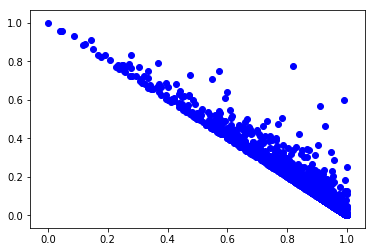

In [33]:


plt.scatter(top100videos_views_df["likes_indicator"], top100videos_views_df["dislikes_indicator"], marker="o", facecolors="blue")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()


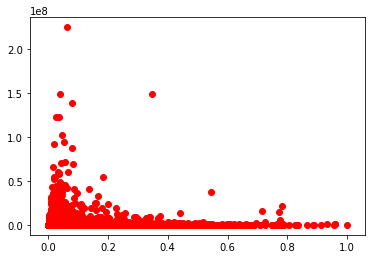

In [21]:
plt.scatter(top100videos_views_df["dislikes_indicator"], top100videos_views_df["views"], marker="o", facecolors="red")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()


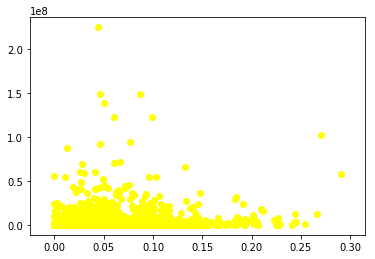

In [22]:
plt.scatter(top100videos_views_df["approve_indicator"], top100videos_views_df["views"], marker="o", facecolors="yellow")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

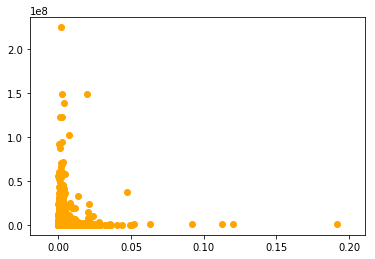

In [23]:

plt.scatter(top100videos_views_df["rejection_indicator"], top100videos_views_df["views"], marker="o", facecolors="orange")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

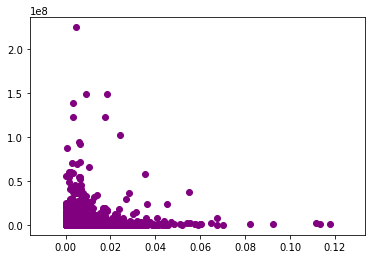

In [24]:

plt.scatter(top100videos_views_df["comment_indicator"], top100videos_views_df["views"], marker="o", facecolors="purple")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()




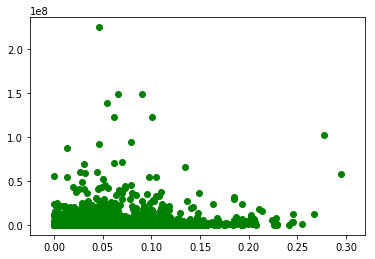

In [25]:
plt.scatter(top100videos_views_df["reaction_indicator"], top100videos_views_df["views"], marker="o", facecolors="green")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

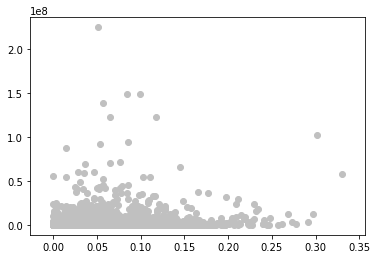

In [26]:
plt.scatter(top100videos_views_df["reaction_global_indicator"], top100videos_views_df["views"], marker="o", facecolors="silver")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

In [27]:
# Inventemos un poco <----- borrar pensamientos.

# -	HIPOTESIS: lo controversial de un video es proporsional a su exito(independientemente de de su categoria) 
# ANALISIS: indicador de controversialidad comment/views; dislikes/views; dislikes/(likes+dislikes); 
# (considerer multiplicar todos los anteriores como indicador global) VS indicador de exito viewstotal; #dias en trending.


